# Step 0: IMPORT LIBARY

In [1]:
!pip install matplotlib
!pip install numpy
!pip install deepcopy
!pip install random
import math
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from random import random

ERROR: Could not find a version that satisfies the requirement deepcopy (from versions: none)
ERROR: No matching distribution found for deepcopy
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


# Step 1:Create perceptron  

In [2]:
def predict(row,weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i+1] * row[i]
    return 1.0 if activation >= 0.0 else -1

# Step 2.1:Generate data point:

In [3]:
def moon(num_points, distance, radius, width):
    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])


# Step 2.2:Process data point

In [23]:
a=moon(10,1,10,6)
print(a)

[[15.155145451122852, 7.529712144935532, -2.113425039831661, -11.350214727092629, -12.709679974533238, 10.940827858499436, -9.315093773760985, -9.828374114236336, 9.994699111271041, 10.740891645166945], [8.865228431879494, 6.160952376141562, 21.000659379701457, 16.409909313130267, 8.435536463447947, 12.830023018190674, -0.055207871807418485, 13.020403927070005, 23.871181598540097, 14.999623153306722], [3.2130180081243576, 10.380497007305731, 14.562343208570152, 9.032994442303131, 9.822496347703485, 10.726334800765606, 13.08754982245327, 6.623440594374137, 3.1469346212839464, 12.759143534954948], [-14.832531782361471, -12.735016830887556, -11.253940839758787, -14.440830114682411, -10.859590236490986, -16.8085249085323, -6.478777594389129, -15.869786751737271, -9.04601791774379, -12.995810895360915]]


In [4]:
def processed_data(x,y,x0,y0):
    dataset1 = np.resize(deepcopy(x), (1, len(x)))
    dataset1 = np.append(dataset1, np.resize(deepcopy(y), (1, len(y))), axis=0)
    dataset1 = np.append(dataset1, np.ones((1, len(x)))*-1, axis=0)
    dataset1 = dataset1.transpose()
    
    dataset2 = np.resize(deepcopy(x0), (1, len(x0)))
    dataset2 = np.append(dataset2, np.resize(deepcopy(y0), (1, len(y0))), axis=0)
    dataset2 = np.append(dataset2, np.ones((1, len(x0))), axis=0)
    dataset2 = dataset2.transpose()
    dataset = np.append(dataset1, dataset2, axis=0)
    np.random.shuffle(dataset)
    return dataset

In [25]:
b=processed_data(a[0],a[2],a[1],a[3])
print(b)

[[  8.43553646 -10.85959024   1.        ]
 [  8.86522843 -14.83253178   1.        ]
 [ 15.15514545   3.21301801  -1.        ]
 [ 13.02040393 -15.86978675   1.        ]
 [  9.99469911   3.14693462  -1.        ]
 [ 10.94082786  10.7263348   -1.        ]
 [-11.35021473   9.03299444  -1.        ]
 [  6.16095238 -12.73501683   1.        ]
 [ 23.8711816   -9.04601792   1.        ]
 [ 12.83002302 -16.80852491   1.        ]
 [-12.70967997   9.82249635  -1.        ]
 [ -0.05520787  -6.47877759   1.        ]
 [ -9.31509377  13.08754982  -1.        ]
 [  7.52971214  10.38049701  -1.        ]
 [ 14.99962315 -12.9958109    1.        ]
 [ 10.74089165  12.75914353  -1.        ]
 [ 21.00065938 -11.25394084   1.        ]
 [ -9.82837411   6.62344059  -1.        ]
 [ -2.11342504  14.56234321  -1.        ]
 [ 16.40990931 -14.44083011   1.        ]]


# Step 3: Adjusting weight

In [5]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights

# Step 4:Plot the data

In [22]:
def display_result(weights, dataset):
    
    label_1_filter = dataset[:,0]*weights[1] + dataset[:,1]*weights[2] >= -weights[0]
    label_1_dataset = dataset[label_1_filter]
    label_2_filter = dataset[:,0]*weights[1] + dataset[:,1]*weights[2] < -weights[0]
    label_2_dataset = dataset[label_2_filter]
    
    min_x_value = -20
    max_x_value = 35
    x = np.asarray([min_x_value, max_x_value])
    y = -(weights[1]*x/weights[2]) - weights[0]/weights[2]
    plt.plot(x, y, c="g")
    plt.ylabel("y")
    plt.xlabel("x")
    
    plt.scatter(label_1_dataset[:, 0], label_1_dataset[:, 1], c='r',s=10)
    plt.scatter(label_2_dataset[:, 0], label_2_dataset[:, 1], c='b',s=10)
    plt.xlim(min_x_value, max_x_value)
    plt.show()
   

# Task 1

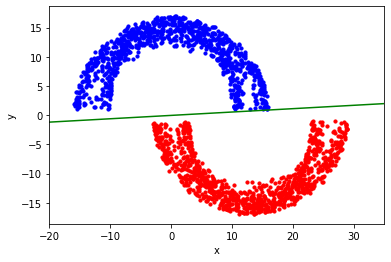

In [7]:
learning_rate = 0.001
raw_dataset = moon(1000, 1, 10, 6)
dataset=processed_data(raw_dataset[0],raw_dataset[2],raw_dataset[1],raw_dataset[3])
weights=train_weights(dataset,learning_rate,100)
display_result(weights,dataset)

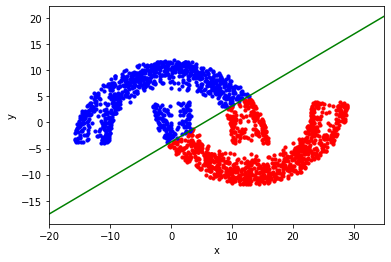

In [19]:
learning_rate = 0.001
raw_dataset = moon(1000, -4, 10, 6)
dataset=processed_data(raw_dataset[0],raw_dataset[2],raw_dataset[1],raw_dataset[3])
weights=train_weights(dataset,learning_rate,100)
display_result(weights,dataset)

# Task 2

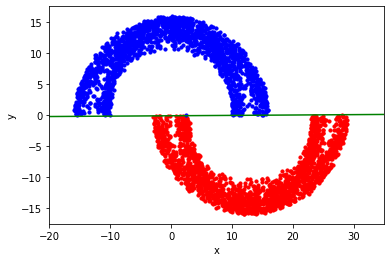

In [9]:
learning_rate = 0.001
raw_dataset = moon(2000, 0, 10, 6)
dataset=processed_data(raw_dataset[0],raw_dataset[2],raw_dataset[1],raw_dataset[3])
weights=train_weights(dataset,learning_rate,100)
display_result(weights,dataset)

# End